# Proyecto Final: Bot Para la bolsa de valores.

### 1) Importación de librerias

In [1]:
import pandas as pd
import numpy  as np
import torch

import matplotlib.pyplot as plt

### 2) Carga del dataset.

In [2]:
# CARGA DE DATOS.

dfx = pd.read_csv("df_var_x.csv")
dfy = pd.read_csv("df_var_y.csv")

###  3) Análisis de los inputs.

Como primera columna podremmos ver el símbolo o abreviatura que representa a la empresa en la empresa en la bolsa.

Así como los cambios sufridos en su precio a distintas ventanas de tiempo.

Y otros indicadores que pueden ser útiles en la predicción.

In [3]:
dfx.tail()

,Ticker,Volumen,PER,Cambio(%) 1_min,Cambio(%) 5_min,Cambio(%) 15_min,Cambio(%) 1_hr,Cambio(%) 4_hr,Cambio(%) 1_sem,Cambio(%) 1_mes,...,RSI,Estocástico,Estocástico D,Valoracion Medias Mov.,SMA20,SMA50,SMA200,B Bollinger Up,B Bollinger Low,Fecha
12324,SIRI,394000.0,25.39,0.17,0.50,0.84,0.84,0.84,3.71,-4.07,...,45.13,30.98,29.13,1,6.11563,6.282452,5.873138,6.576770,5.654490,25-ene-21
12325,SPLK,53000.0,0.00,0.15,0.03,1.65,1.65,1.65,2.21,-1.85,...,53.10,78.15,77.77,-1,169.99200,176.549800,184.039525,178.490641,161.493359,25-ene-21
12326,TCOM,170000.0,0.00,-0.64,-0.33,0.12,0.12,0.12,1.48,2.03,...,51.25,52.17,62.16,-1,33.26050,33.766400,29.285200,34.635963,31.885037,25-ene-21
12327,WDAY,113000.0,0.00,-0.22,0.11,1.21,1.21,1.21,7.12,-7.49,...,58.30,71.54,52.29,-1,230.81900,227.745600,199.339775,245.616342,216.021659,25-ene-21
12328,ZM,467000.0,267.33,0.65,0.37,3.74,3.74,3.74,3.45,-2.74,...,56.84,77.59,74.63,-1,364.83450,394.305600,325.599225,402.201510,327.467490,25-ene-21


Aqui los datos que quedan sobrando son la fecha y el identificador de la empresa por lo que  vamos a elimanarlo.

In [4]:
dfx = dfx.drop("Ticker",1)
dfx = dfx.drop("Fecha" ,1)

dfx.tail()

,Volumen,PER,Cambio(%) 1_min,Cambio(%) 5_min,Cambio(%) 15_min,Cambio(%) 1_hr,Cambio(%) 4_hr,Cambio(%) 1_sem,Cambio(%) 1_mes,Cambio(%) 3_meses,...,Momento,RSI,Estocástico,Estocástico D,Valoracion Medias Mov.,SMA20,SMA50,SMA200,B Bollinger Up,B Bollinger Low
12324,394000.0,25.39,0.17,0.50,0.84,0.84,0.84,3.71,-4.07,0.42,...,0.105,45.13,30.98,29.13,1,6.11563,6.282452,5.873138,6.576770,5.654490
12325,53000.0,0.00,0.15,0.03,1.65,1.65,1.65,2.21,-1.85,-20.84,...,8.328,53.10,78.15,77.77,-1,169.99200,176.549800,184.039525,178.490641,161.493359
12326,170000.0,0.00,-0.64,-0.33,0.12,0.12,0.12,1.48,2.03,9.37,...,-0.130,51.25,52.17,62.16,-1,33.26050,33.766400,29.285200,34.635963,31.885037
12327,113000.0,0.00,-0.22,0.11,1.21,1.21,1.21,7.12,-7.49,7.95,...,10.760,58.30,71.54,52.29,-1,230.81900,227.745600,199.339775,245.616342,216.021659
12328,467000.0,267.33,0.65,0.37,3.74,3.74,3.74,3.45,-2.74,-23.58,...,48.195,56.84,77.59,74.63,-1,364.83450,394.305600,325.599225,402.201510,327.467490


Veamos algunas de sus estadísticas y las carácteristicas del dataset.

In [5]:
dfx.describe()

,Volumen,PER,Cambio(%) 1_min,Cambio(%) 5_min,Cambio(%) 15_min,Cambio(%) 1_hr,Cambio(%) 4_hr,Cambio(%) 1_sem,Cambio(%) 1_mes,Cambio(%) 3_meses,...,Momento,RSI,Estocástico,Estocástico D,Valoracion Medias Mov.,SMA20,SMA50,SMA200,B Bollinger Up,B Bollinger Low
count,1.232400e+04,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.00000,12329.000000,12329.000000,12327.000000,...,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12295.000000,12329.000000,12329.000000
mean,1.612864e+06,37.010709,0.000802,-0.007493,0.004636,0.046101,0.12587,1.032396,3.541626,17.287816,...,3.113343,56.117331,57.818196,57.529550,-0.472626,174.970956,170.118544,151.098473,184.030657,165.911255
std,6.220227e+06,79.743630,0.134198,0.390783,0.705076,0.927110,1.22063,4.209886,8.178368,20.238757,...,19.286715,10.605171,26.317950,25.203987,0.854570,312.195039,307.192641,272.020057,326.537415,298.079782
min,0.000000e+00,0.000000,-1.360000,-5.120000,-5.180000,-7.440000,-7.98000,-18.690000,-88.160000,-89.230000,...,-301.495000,12.440000,0.850000,0.690000,-1.000000,6.115630,5.411500,5.230075,6.514515,-17.315843
25%,7.600000e+04,13.610000,-0.060000,-0.120000,-0.200000,-0.310000,-0.49000,-1.460000,-1.380000,3.390000,...,-1.450000,48.820000,35.360000,35.740000,-1.000000,50.719600,48.275000,43.200446,53.455438,47.652060
50%,2.850000e+05,25.110000,0.000000,-0.010000,-0.010000,-0.010000,0.06000,0.500000,2.510000,14.060000,...,0.810000,55.760000,62.110000,61.920000,-1.000000,103.341500,99.633800,90.391650,108.415207,97.272850
75%,1.000000e+06,38.590000,0.060000,0.090000,0.160000,0.320000,0.67000,2.800000,7.530000,27.280000,...,4.870000,63.430000,81.400000,80.110000,0.000000,186.699000,179.744700,163.443013,201.059386,174.365948
max,2.820000e+08,1758.630000,1.720000,22.310000,22.310000,22.310000,22.31000,30.180000,59.460000,159.750000,...,597.520000,89.940000,99.480000,98.010000,1.000000,4123.492000,4141.338800,3762.733450,4475.002309,3914.264890


La pregunta fundamental de este proyecto es reponder a la pregunta  <b>¿Es posible predecir los precios de las acciones?</b> 
 
Para empezar veamos como cambia la distribuición de cambios confrome avanza el tiempo.

Text(0.5, 1.0, 'Cambios a 1 semana.')

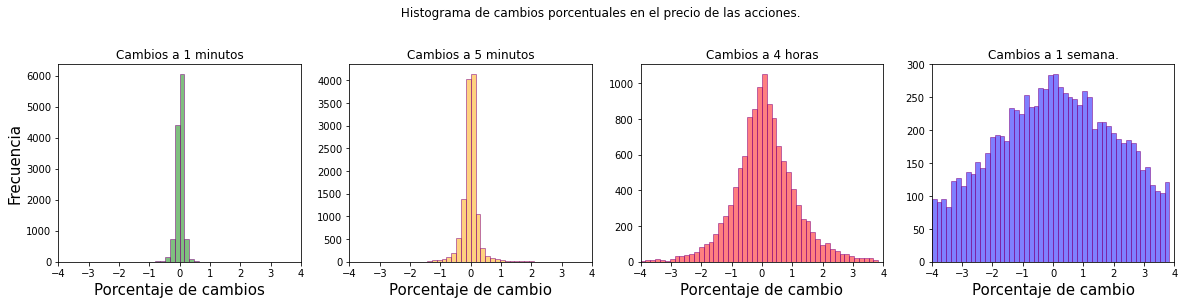

In [6]:
bins = [-4 + i*0.16 for i in range(50)]

plt.figure(figsize=(20,8))
plt.suptitle(" Histograma de cambios porcentuales en el precio de las acciones.")

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(dfx["Cambio(%) 1_min"], bins=bins, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Porcentaje de cambios', size=15)
ax1.set_ylabel('Frecuencia', size=15)
ax1.set_xlim([-4,4])
ax1.set_title("Cambios a 1 minutos")

ax2.hist(dfx["Cambio(%) 5_min"], bins=bins, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Porcentaje de cambio', size=15)
ax2.set_xlim([-4,4])
ax2.set_title("Cambios a 5 minutos")

ax3.hist(dfx["Cambio(%) 4_hr"], bins=bins, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Porcentaje de cambio', size=15)
ax3.set_xlim([-4,4])
ax3.set_title("Cambios a 4 horas")


ax4.hist(dfx["Cambio(%) 1_sem"], bins=bins, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Porcentaje de cambio', size=15);
ax4.set_xlim([-4,4])
ax4.set_title("Cambios a 1 semana.")

Como podemos ver, la distribuición de cambio parece una distriuición normal centrada aproximadamente en el 0, y con desviación estandar que aumenta con el tiempo.

Lo que nos dice esto es que estadísticamente los precios siempre estan cambiando y van en general alejandose de su precio actual. 

Sin embargo podemos ver que el promedio a ventanas grandes de tiempo esta centrada más bien en un número positivo. Esto refleja el hecho que la economía en terminos generales  tiende a un creciemiento. (Ver las tablas de algunas celdas más arriba en dfx.describe())

Este último hecho nos da un referencia con la cual comparar nuestro algortimo. Por ejemplo el promedio de cambio porcentual a 3 meses es del 17% , por lo para cantar victoria con nuestros modelos y decir que es mejor que hacer compras de acciones al azar, el modelo tiene que elegir comprar acciones cuyo promedio de cambio supere el 17% a 3 meses. 


<b> Sobre las otros categorias. </b>

Las demás categorias presentes en los datos de entrada corresponden a indicadores del movimiento del mercado, como lo puede ser el promedio de cambio de precio en algun intervalo de tiempo. Por lo que puede ser útil para la red tenerlos presentes durante el entrenamiento e inferencia.


### 4)  Analizando el dataframe de los label

En este caso proponemos  como predicción del modelo predecir como se va a mover el precio a una ventana de 1 día. Por lo que etiquetamos con un 1 a las acciones que subieron de precio, con un cero a las acciones que no subieron de precio.

In [7]:
dfy.tail()

,Ticker,Cambio(%) 1_dia,Fecha
12324,SIRI,1,25-ene-21
12325,SPLK,1,25-ene-21
12326,TCOM,-1,25-ene-21
12327,WDAY,-1,25-ene-21
12328,ZM,1,25-ene-21


Eliminamos las columnas inecesareas.

In [8]:
dfy = pd.DataFrame({"Cambio(%) 1_dia":dfy["Cambio(%) 1_dia"]})

In [9]:
dfy.tail()

,Cambio(%) 1_dia
12324,1
12325,1
12326,-1
12327,-1
12328,1


Text(0.5, 1.0, 'Cambios a 1 minutos')

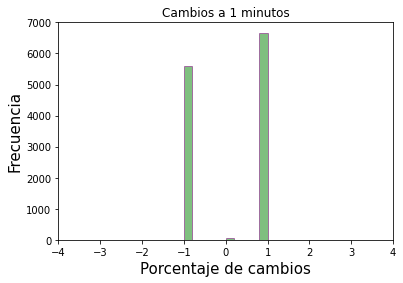

In [10]:
ax5 = plt.subplot(1,1,1)
ax5.hist(dfy["Cambio(%) 1_dia"], color='green',edgecolor='purple', alpha=0.5)
ax5.set_xlabel('Porcentaje de cambios', size=15)
ax5.set_ylabel('Frecuencia', size=15)
ax5.set_xlim([-4,4])
ax5.set_title("Cambios a 1 minutos")

###  5) Buscamos  datos faltantes.

In [11]:
dfx.isnull().sum()

Volumen                       5
PER                           0
Cambio(%) 1_min               0
Cambio(%) 5_min               0
Cambio(%) 15_min              0
Cambio(%) 1_hr                0
Cambio(%) 4_hr                0
Cambio(%) 1_sem               0
Cambio(%) 1_mes               0
Cambio(%) 3_meses             2
Cambio(%) 6_meses            22
Cambio(%) 1_año              66
Volatilidad                   0
valoracion de osciladores     0
ADX                           0
AO                            0
ATR                           0
CCI20                         0
Nivel MACD                    0
Señal MACD                    0
Momento                       0
RSI                           0
Estocástico                   0
Estocástico D                 0
Valoracion Medias Mov.        0
SMA20                         0
SMA50                         0
SMA200                       34
B Bollinger Up                0
B Bollinger Low               0
dtype: int64

Vemos que si hay datos faltantes, los eliminaremos directamente del dataset.

In [12]:
all_data = pd.concat([dfx,dfy],axis=1,join="inner")
all_data = all_data.dropna()
dfy = all_data["Cambio(%) 1_dia"]
dfx = all_data.drop("Cambio(%) 1_dia",1)

dfx.isnull().sum()

Volumen                      0
PER                          0
Cambio(%) 1_min              0
Cambio(%) 5_min              0
Cambio(%) 15_min             0
Cambio(%) 1_hr               0
Cambio(%) 4_hr               0
Cambio(%) 1_sem              0
Cambio(%) 1_mes              0
Cambio(%) 3_meses            0
Cambio(%) 6_meses            0
Cambio(%) 1_año              0
Volatilidad                  0
valoracion de osciladores    0
ADX                          0
AO                           0
ATR                          0
CCI20                        0
Nivel MACD                   0
Señal MACD                   0
Momento                      0
RSI                          0
Estocástico                  0
Estocástico D                0
Valoracion Medias Mov.       0
SMA20                        0
SMA50                        0
SMA200                       0
B Bollinger Up               0
B Bollinger Low              0
dtype: int64

Como se puede ver ya no hay datos faltantes. 

In [13]:
print(dfx.shape)
print(dfy.shape)

dfx.tail()

(12258, 30)
(12258,)


,Volumen,PER,Cambio(%) 1_min,Cambio(%) 5_min,Cambio(%) 15_min,Cambio(%) 1_hr,Cambio(%) 4_hr,Cambio(%) 1_sem,Cambio(%) 1_mes,Cambio(%) 3_meses,...,Momento,RSI,Estocástico,Estocástico D,Valoracion Medias Mov.,SMA20,SMA50,SMA200,B Bollinger Up,B Bollinger Low
12324,394000.0,25.39,0.17,0.50,0.84,0.84,0.84,3.71,-4.07,0.42,...,0.105,45.13,30.98,29.13,1,6.11563,6.282452,5.873138,6.576770,5.654490
12325,53000.0,0.00,0.15,0.03,1.65,1.65,1.65,2.21,-1.85,-20.84,...,8.328,53.10,78.15,77.77,-1,169.99200,176.549800,184.039525,178.490641,161.493359
12326,170000.0,0.00,-0.64,-0.33,0.12,0.12,0.12,1.48,2.03,9.37,...,-0.130,51.25,52.17,62.16,-1,33.26050,33.766400,29.285200,34.635963,31.885037
12327,113000.0,0.00,-0.22,0.11,1.21,1.21,1.21,7.12,-7.49,7.95,...,10.760,58.30,71.54,52.29,-1,230.81900,227.745600,199.339775,245.616342,216.021659
12328,467000.0,267.33,0.65,0.37,3.74,3.74,3.74,3.45,-2.74,-23.58,...,48.195,56.84,77.59,74.63,-1,364.83450,394.305600,325.599225,402.201510,327.467490


### 6) Normalización de los datos.

In [14]:
dfx_norm = ( dfx - dfx.mean() ) / dfx.std()
dfx_norm.tail()

,Volumen,PER,Cambio(%) 1_min,Cambio(%) 5_min,Cambio(%) 15_min,Cambio(%) 1_hr,Cambio(%) 4_hr,Cambio(%) 1_sem,Cambio(%) 1_mes,Cambio(%) 3_meses,...,Momento,RSI,Estocástico,Estocástico D,Valoracion Medias Mov.,SMA20,SMA50,SMA200,B Bollinger Up,B Bollinger Low
12324,-0.196023,-0.146793,1.268714,1.299641,1.185561,0.856492,0.584339,0.635346,-0.929554,-0.833532,...,-0.163362,-1.035170,-1.018135,-1.124381,1.723837,-0.554689,-0.547618,-0.548161,-0.557677,-0.550983
12325,-0.250712,-0.464353,1.118808,0.096863,2.335313,1.730715,1.248112,0.279141,-0.658665,-1.882191,...,0.290160,-0.284700,0.773273,0.803957,-0.617006,-0.013465,0.024758,0.129773,-0.014496,-0.012326
12326,-0.231947,-0.464353,-4.802469,-0.824414,0.163559,0.079405,-0.005682,0.105787,-0.185219,-0.392069,...,-0.176323,-0.458899,-0.213388,0.185097,-0.617006,-0.465039,-0.455228,-0.459077,-0.469021,-0.460317
12327,-0.241089,-0.464353,-1.654448,0.301591,1.710756,1.255828,0.887544,1.445120,-1.346869,-0.462112,...,0.424292,0.204942,0.522240,-0.206200,-0.617006,0.187425,0.196860,0.187991,0.197596,0.176151
12328,-0.184315,2.879224,4.866452,0.966958,5.301957,3.986425,2.960811,0.573604,-0.767264,-2.017343,...,2.488938,0.067466,0.752005,0.679471,-0.617006,0.630029,0.756773,0.668416,0.692344,0.561364


### 7) Generamos los conjuntos de entrenamineto y de test.

In [15]:
TEST_RATIO = 0.1

train_ratio = int((1.0-TEST_RATIO)*len(dfx.values[:,:]))

dfx_train = dfx_norm.iloc[0:train_ratio,:]
dfy_train = dfy.iloc[0:train_ratio]

dfx_test  = dfx_norm.iloc[train_ratio:,:]
dfy_test  = dfy.iloc[train_ratio:]



print("Shapes de los conjuntos:")
print(dfx_train.shape)
print(dfy_train.shape)
print("")
print(dfx_test.shape)
print(dfy_test.shape)



Shapes de los conjuntos:
(11032, 30)
(11032,)

(1226, 30)
(1226,)


### 8) Obtenemos los datos en formato numpy.

In [16]:
# Obtenemos los valores del dataframe.

x_train = dfx_train.to_numpy()
y_train = dfy_train.to_numpy()

x_test  = dfx_test.to_numpy()
y_test  = dfy_test.to_numpy()